In [2]:
% matplotlib inline
import numpy as np
import pandas as pd

In [3]:
## Electricity
#df = pd.read_table('household_power_consumption.txt',sep=';',low_memory=False)
# df = df.rename(columns = {
#     'Sub_metering_1':'kitchen',
#     'Sub_metering_2':'laundry room',
#     'Sub_metering_3':'heater',
# })
# df

# df[['heater']] = df[['heater']].astype(float)
# df

In [4]:
headers = ['Transaction unique identifier','Price','Date of Transfer','Postcode','Property Type','Old/New','Duration',
          'PAON','SAON','PPD Category Type']
# Transaction unique identifier	A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.
# Price	Sale price stated on the transfer deed.
# Date of Transfer	Date when the sale was completed, as stated on the transfer deed.
# Postcode	This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated and these changes are not reflected in the Price Paid Dataset.
# Property Type	D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other 
# Note that: 
# - we only record the above categories to describe property type, we do not separately identify bungalows. 
# - end-of-terrace properties are included in the Terraced category above. 
# - ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values.
# Old/New	Indicates the age of the property and applies to all price paid transactions, residential and non-residential.
# Y = a newly built property, N = an established residential building
# Duration	Relates to the tenure: F = Freehold, L= Leasehold etc.
# Note that Land Registry does not record leases of 7 years or less in the Price Paid Dataset.
# PAON	Primary Addressable Object Name. If there is a sub-building for example the building is divided into flats, see Secondary Addressable Object Name (SAON).
# SAON	Secondary Addressable Object Name. If there is a sub-building, for example the building is divided into flats, there will be a SAON.
# Street	 
# Locality	 
# Town/City	 
# District	 
# County	 
# PPD Category Type	Indicates the type of Price Paid transaction.
# A = Standard Price Paid entry, includes single residential property sold for full market value.
# B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets 
#(where they can be identified by a Mortgage) and transfers to non-private individuals.
# Note that category B does not separately identify the transaction types stated.
# Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.
# Record Status - monthly file only	Indicates additions, changes and deletions to the records.(see guide below).
# A = Addition
# C = Change
# D = Delete.

# Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.


In [24]:
df = pd.read_csv('pp-complete.csv',low_memory=False,skiprows=19000000)
#data.rename(columns={1:'price'}, inplace=True) 
#df.head(1)

In [25]:
df = df.rename(columns = {
    df.columns[0]:headers[0],
    df.columns[1]:headers[1],
    df.columns[2]:headers[2],
    df.columns[3]:headers[3],
    df.columns[4]:headers[4],
    df.columns[5]:headers[5],
    df.columns[6]:headers[6],
    df.columns[14]:'PPD Category Type'
})


# delete stuff
del df[df.columns[7]]
del df[df.columns[7]]
del df[df.columns[7]]
del df[df.columns[7]]
del df[df.columns[7]]
del df[df.columns[7]]
del df[df.columns[7]]
del df[df.columns[8]]
#new_df =df[df[]]

## Make thing for year and drop all outside of crime range
df['Year']=df['Date of Transfer'].map(lambda x:  int(x.split('-')[0]))
df['Month']=df['Date of Transfer'].map(lambda x: int(x.split('-')[1]))



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [26]:
df = df[(df['Year']>=2013) & (df['Month']==11) | (df['Year']>=2014) ]
#new_df_G =new_df.groupby(['Postcode','Property Type'])

In [45]:
# make columns for classification
df['Gen_post'] = df['Postcode'].map(lambda x:  str(x).split()[0])
df['Delta_t'] = (df['Year']-2013)*12 + df['Month']-11



#Kick out all non London postcodes 
# All those that have names other than E, EC, N, NW, SE, SW, W, WC in the genearl post code
# scrap elegance just do it
df['Post_let']  = df['Gen_post'].map(lambda x: ''.join(i for i in x if not i.isdigit()))
#df['Post_let']
#df.loc[df['column_name'].isin(some_values)]

df_E = df[df['Post_let'] == 'E'] 
df_EC = df[df['Post_let'] == 'EC'] 
df_N = df[df['Post_let'] == 'N']
df_NW = df[df['Post_let'] == 'NW']
df_SE = df[df['Post_let'] == 'SE']
df_SW = df[df['Post_let'] ==  'SW']
df_W = df[df['Post_let'] ==  'W']
df_WC = df[df['Post_let'] ==  'WC'] 

f = [ df_EC, df_E, df_N, df_NW, df_SE, df_SW, df_W, df_WC]
df_L = pd.concat(f)




In [ ]:
#generate location
#PC = pd.read_csv('ukpostcodes.csv')
#df_L_sub = df_L.head(100)
#PC.loc[PC['postcode'] == df_L['Postcode'][x]]['latitude']#PC

# Too slow on laptop
#df_L['lat']=df_L_sub['Postcode'].map(lambda x: PC.loc[PC['postcode'] == x,:]['latitude'].values)
#df_L['long']=df_L['Postcode'].map(lambda x: PC.loc[PC['postcode'] == x,:]['longitude'].values)
from postcodes import PostCoder
# pc = PostCoder()
# print pc.get("W12 9LB")
def postcode_helper(code):
    pc = PostCoder()
    result = pc.get(code)
    #print result
    if result is None:
        return np.NaN # to be dropped
    else:
        return [result['geo']['lat'],result['geo']['lng']]

y = postcode_helper("W75 2AZ")
#print y , type(y)
df_L['Loc'] = df_L['Postcode'].map(lambda x: postcode_helper(x))
#df_L['lat'][138] = PC['latitude'][x]
#df_L['long'][138] = PC['longitude'][x]
#PC.postcode.loc[PC.postcode.isin()]
    #df.loc[df['column_name'] == some_value]
#df_L

In [38]:
#df_W['Post_let']

#del df[df.columns[8]]
df_D = df_L[df_L['Property Type'] == 'D']
df_S = df_L[df_L['Property Type'] == 'S']
df_T = df_L[df_L['Property Type'] == 'T']
df_F = df_L[df_L['Property Type'] == 'F']
df_G = df_D.groupby(['Gen_post','Delta_t'])



AttributeError: Cannot access attribute 'values' of 'SeriesGroupBy' objects, try using the 'apply' method

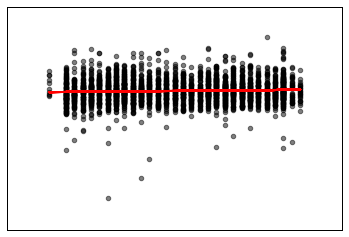

[ 13.86922782] [[ 0.00561997]]


In [44]:
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

#Plot one detached houses all of london
x = df_D['Delta_t'].values
y = df_D['Price'].values
y = np.log(y)

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

# print max(y)
# plt.scatter(x, y,  color='k', alpha = 0.5)
plt.show()
# plot to check
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 10000 # to enable plotting
plt.scatter(x, y,  color='k', alpha = 0.5)
plt.plot(x, regr.predict(x), color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

print regr.intercept_, regr.coef_

#df_G.plot(kind='scatter')

In [39]:
#df['Year']=df['Date of Transfer'].map(lambda x: x.split('-')[0])
#= df['Location'].map(lambda x: float(x.split()[0][1:-1]))

In [40]:
new_df

Empty DataFrame
Columns: [Transaction unique identifier, Price, Date of Transfer, Postcode, Property Type, Old/New, Duration, PPD Category Type, Year, Month]
Index: []